# Universe

In [1]:
import FinanceDataReader as fdr
import pandas as pd
#import warnings

#warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
path_data = 'data'

In [3]:
#stocks = fdr.StockListing('KOSPI-DESC') # KOSPI
#stocks = fdr.StockListing('KOSPI') # 종목수는 2022년 10월 25일 기준?
#etfs = fdr.StockListing('ETF/KR') # 한국 ETF 전종목
tickers_200 = fdr.SnapDataReader('KRX/INDEX/STOCK/1028') # 코스피 200

In [4]:
%%time
#tickers = tickers_200.Code
#df_200 = fdr.DataReader(tickers, '2021')

CPU times: user 4 μs, sys: 4 μs, total: 8 μs
Wall time: 13.1 μs


In [5]:
#file = 'df_200.csv'
#df_200.to_csv(f'{path_data}/{file}')

In [6]:
file = 'df_200.csv'
df_200 = pd.read_csv(f'{path_data}/{file}', parse_dates=[0], index_col=[0])

In [7]:
df_200.tail()

,051600,001040,001440,316140,004800,028260,192080,383220,036460,185750,...,011170,004020,012750,032830,003620,039130,105560,021240,192820,009420
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-19,37200,124800,15700,14140,57300,135400,44500,65100.0,55800,100400,...,112300,28950,58700,87400,5340,57000,78900,55200,187100,33000
2024-06-20,36900,122600,15610,14360,57200,135100,45700,64400.0,63500,101600,...,120500,29350,59500,87600,5310,57400,80800,55900,180000,33000
2024-06-21,37200,125500,16240,14240,57800,135300,45400,63000.0,61900,94600,...,115000,29600,57600,87000,5250,59600,78600,58200,187000,33350
2024-06-24,37300,117000,15680,14490,57200,135900,45750,62200.0,63500,95800,...,115000,28950,56800,87000,5170,58500,80000,58000,184100,32300
2024-06-25,37200,117500,15800,14580,57200,135400,47050,62800.0,62000,96600,...,117400,29200,57600,87800,5210,59000,79900,59700,186700,32600


# Momentum

In [8]:
from pf_utils import StaticPortfolio, DynamicPortfolio, metrics

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Simple

In [9]:
ticker = '069500'
start = df_200.index[0].strftime('%Y-%m-%d')
end = df_200.index[-1].strftime('%Y-%m-%d')
df_baseline = fdr.DataReader(ticker, start, end)

name='KOSPI' 
df_baseline = df_baseline.Close.rename(name)

#### Lag

In [10]:
bts = DynamicPortfolio(df_200, align_axis=1, 
                       metrics=metrics, initial_capital=10000000)

In [11]:
bts.benchmark(df_baseline, name=name, align_axis=1)

ratio of nan filled forward::
  KOSPI: 0.000


In [12]:
for lag in [0, 7, 14, 30]:
    bts.build(n_equities=5, lookback=12, lag=lag,
              freq='M', name=f'{lag} day lag')

15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)


100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 115228.13it/s]

Returning stats


,KOSPI,0 day lag,7 day lag,14 day lag,30 day lag
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,0.014736,5.52554,4.530404,4.904986,3.631139
cagr,0.004219,0.715801,0.636003,0.667156,0.554539
calmar,0.012322,2.824258,2.353009,2.479996,1.767025
max_drawdown,-0.342432,-0.253448,-0.270293,-0.269015,-0.313826
avg_drawdown,-0.08767,-0.058439,-0.057357,-0.062521,-0.057454
avg_drawdown_days,209.0,18.475,16.795455,19.025641,19.684211
daily_vol,0.17231,0.395361,0.383803,0.388612,0.373516
daily_sharpe,0.110941,1.591989,1.501455,1.537181,1.392643


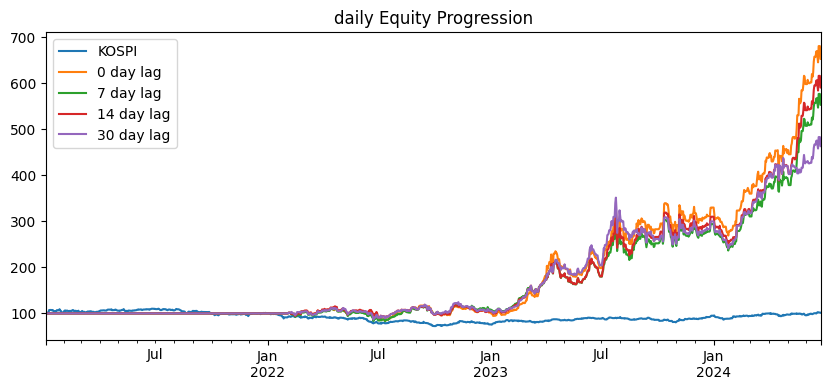

In [14]:
bts.run(figsize=(10,4))

#### Lookback

In [15]:
bts = DynamicPortfolio(df_200, align_axis=1, 
                       metrics=metrics, initial_capital=10000000)

In [16]:
bts.benchmark(df_baseline, name=name, align_axis=1)

ratio of nan filled forward::
  KOSPI: 0.000


In [17]:
lag = 0 
for lookback in [3, 6, 12]:
    bts.build(n_equities=5, lookback=lookback, lag=lag,
              freq='M', name=f'{lookback} month lookback')

15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.23it/s]

Returning stats


,KOSPI,3 month lookback,6 month lookback,12 month lookback
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,0.014736,1.230796,1.835032,5.52554
cagr,0.004219,0.259782,0.349763,0.715801
calmar,0.012322,0.585568,0.89205,2.824258
max_drawdown,-0.342432,-0.443641,-0.392089,-0.253448
avg_drawdown,-0.08767,-0.13315,-0.102267,-0.058439
avg_drawdown_days,209.0,92.833333,42.695652,18.475
daily_vol,0.17231,0.40927,0.382443,0.395361
daily_sharpe,0.110941,0.779544,0.990737,1.591989


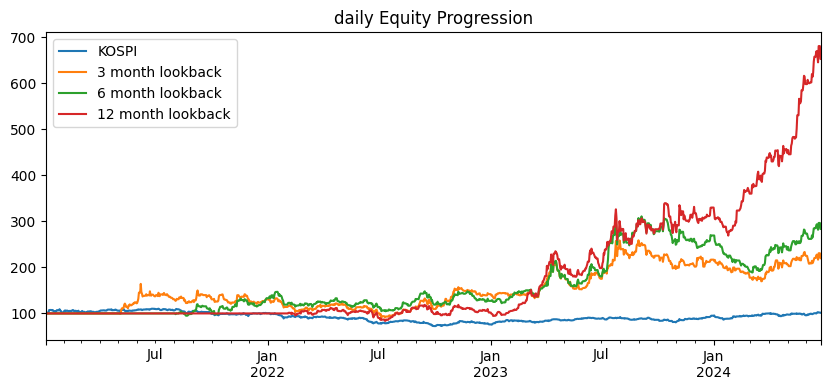

In [18]:
bts.run(figsize=(10,4))

#### number of equities

In [23]:
bts = DynamicPortfolio(df_200, align_axis=1, 
                       metrics=metrics, initial_capital=10000000)

In [24]:
bts.benchmark(df_baseline, name=name, align_axis=1)

ratio of nan filled forward::
  KOSPI: 0.000


In [25]:
lag = 0 
lookback = 12
for n in [2, 5, 10]:
    bts.build(n_equities=n, lookback=lookback, lag=lag,
              freq='M', name=f'{n} equities')

15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.37it/s]

Returning stats


,KOSPI,2 equities,5 equities,10 equities
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,0.014736,4.359419,5.52554,2.34073
cagr,0.004219,0.621281,0.715801,0.415059
calmar,0.012322,1.834426,2.824258,1.947466
max_drawdown,-0.342432,-0.338679,-0.253448,-0.213128
avg_drawdown,-0.08767,-0.130357,-0.058439,-0.056089
avg_drawdown_days,209.0,40.1,18.475,28.444444
daily_vol,0.17231,0.528656,0.395361,0.278328
daily_sharpe,0.110941,1.195613,1.591989,1.413894


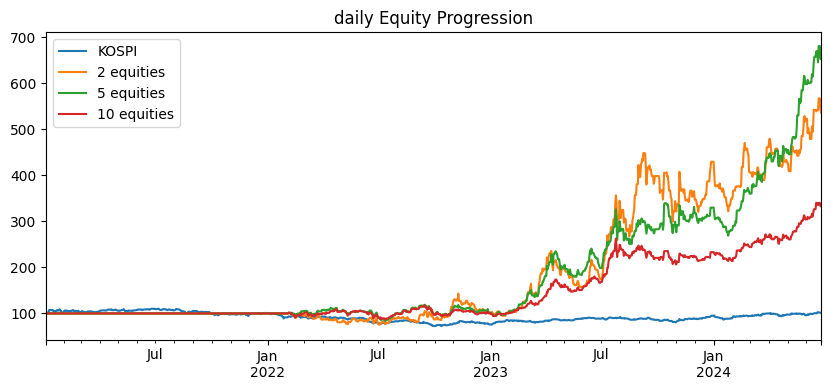

In [26]:
bts.run(figsize=(10,4))

#### More

In [72]:
bts = DynamicPortfolio(df_200, align_axis=1, 
                       metrics=metrics, initial_capital=10000000)

In [73]:
bts.benchmark(df_baseline, name=name, align_axis=1)

ratio of nan filled forward::
  KOSPI: 0.000


In [74]:
for lookback in [3, 6, 12]:
    for lag in [0, 7, 14, 30]:
        bts.build(n_equities=5, lookback=lookback, lag=lag,
                  freq='M', name=f'{lookback} month lookback with {lag} day lag')

15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)


In [75]:
bts.run(figsize=(10,4), plot=False)

100%|███████████████████████████████████████████████████████████████| 13/13 [00:04<00:00,  2.92it/s]

Returning stats


,KOSPI,3 month lookback with 0 day lag,3 month lookback with 7 day lag,3 month lookback with 14 day lag,3 month lookback with 30 day lag,6 month lookback with 0 day lag,6 month lookback with 7 day lag,6 month lookback with 14 day lag,6 month lookback with 30 day lag,12 month lookback with 0 day lag,12 month lookback with 7 day lag,12 month lookback with 14 day lag,12 month lookback with 30 day lag
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,0.014736,1.230796,2.438515,1.940368,2.011564,1.835032,1.30333,0.991751,1.57626,5.52554,4.530404,4.904986,3.631139
cagr,0.004219,0.259782,0.426859,0.364011,0.373436,0.349763,0.271438,0.219347,0.313086,0.715801,0.636003,0.667156,0.554539
calmar,0.012322,0.585568,1.492019,0.934083,1.517054,0.89205,0.772753,0.577634,1.273544,2.824258,2.353009,2.479996,1.767025
max_drawdown,-0.342432,-0.443641,-0.286095,-0.389698,-0.246159,-0.392089,-0.351261,-0.379734,-0.245838,-0.253448,-0.270293,-0.269015,-0.313826
avg_drawdown,-0.08767,-0.13315,-0.074183,-0.084976,-0.052952,-0.102267,-0.1302,-0.103139,-0.069324,-0.058439,-0.057357,-0.062521,-0.057454
avg_drawdown_days,209.0,92.833333,32.212121,51.619048,25.073171,42.695652,62.6875,59.470588,45.761905,18.475,16.795455,19.025641,19.684211
daily_vol,0.17231,0.40927,0.368969,0.381209,0.339856,0.382443,0.377755,0.357825,0.348611,0.395361,0.383803,0.388612,0.373516
daily_sharpe,0.110941,0.779544,1.167712,1.020654,1.122648,0.990737,0.836889,0.744013,0.971657,1.591989,1.501455,1.537181,1.392643


In [81]:
df = bts.get_stats(sort_by='monthly_sharpe')
pf = ['KOSPI'] + df.columns[:3].to_list()

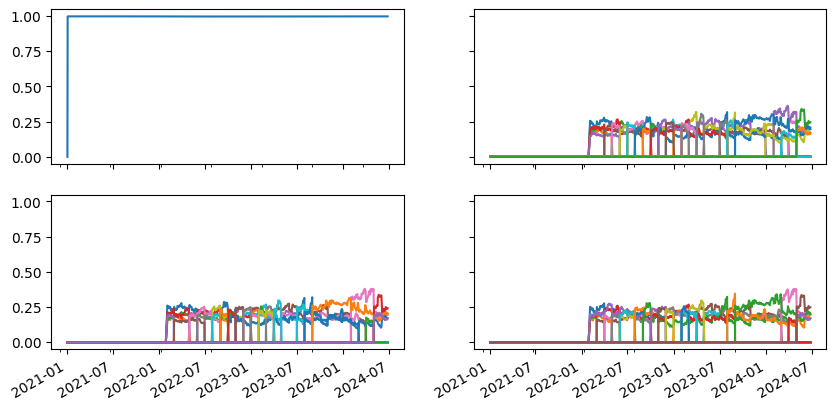

In [82]:
bts.plot_security_weights(pf, legend=False)

In [83]:
bts.get_historical(pf).tail()

,KOSPI,12 month lookback with 0 day lag,12 month lookback with 7 day lag,12 month lookback with 14 day lag
2024-06-19,102.43124,656.17055,556.06337,593.9001
2024-06-20,102.83024,645.05855,546.74637,583.8071
2024-06-21,101.95244,680.33155,576.41837,615.6951
2024-06-24,101.18104,652.15255,552.67337,590.2181
2024-06-25,101.47364,652.55405,553.04037,590.4986


In [85]:
bts.get_transactions(pf[1]).tail(10)

price  quantity
Date       Security                    
2024-05-02 022100     40250.0      58.0
           042700    133000.0       2.0
           047050     46200.0    -139.0
           079550    178900.0     -67.0
           267260    239500.0     -19.0
2024-06-03 003230    587000.0     -14.0
           010120    213000.0       1.0
           022100     35650.0     111.0
           042700    146700.0      16.0
           267260    291000.0       5.0

## K-ratio

In [319]:
bts = DynamicPortfolio(df_200, align_axis=1, 
                       metrics=metrics, initial_capital=10000000)

In [320]:
bts.benchmark(df_baseline, name=name, align_axis=1)

ratio of nan filled forward::
  KOSPI: 0.000


In [321]:
kwags = dict(n_equities=5, lookback=12, lag=0)
bts.build(name='Simple Momentum', **kwags)
bts.build('k-ratio', name='K-ratio', **kwags)

15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.20s/it]

Returning stats


,KOSPI,Simple Momentum,K-ratio
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,0.014736,5.52554,1.315551
cagr,0.004219,0.715801,0.273376
calmar,0.012322,2.824258,0.927906
max_drawdown,-0.342432,-0.253448,-0.294616
avg_drawdown,-0.08767,-0.058439,-0.044881
avg_drawdown_days,209.0,18.475,27.964286
daily_vol,0.17231,0.395361,0.244289
daily_sharpe,0.110941,1.591989,1.132774


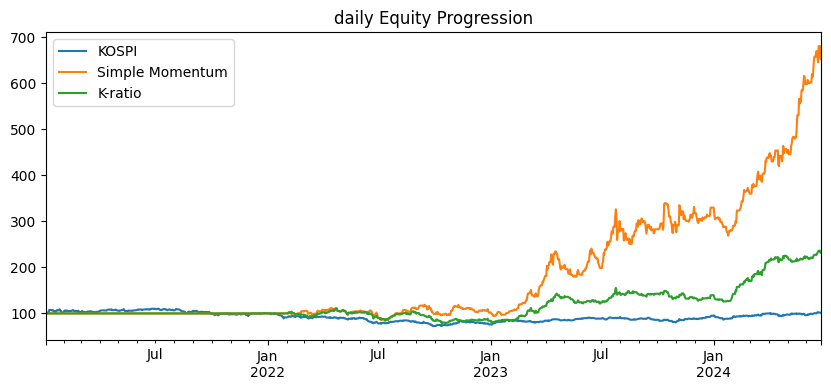

In [322]:
bts.run(figsize=(10,4))

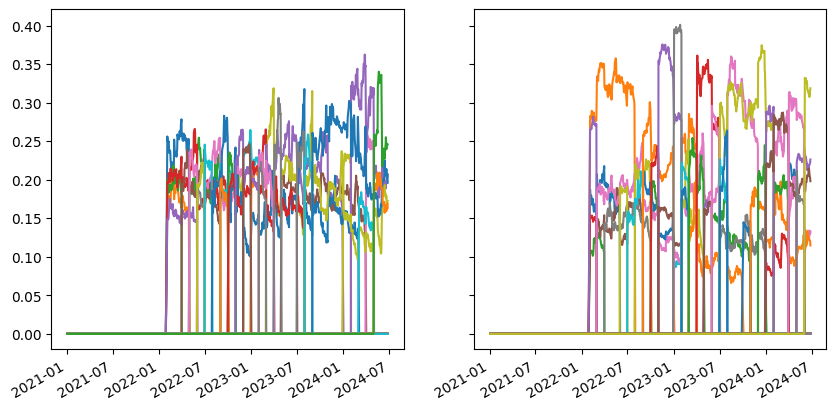

In [324]:
pf = [1,2]
bts.plot_security_weights(pf, legend=False)

# Implement

## Algos

In [318]:
from bt.core import Algo, AlgoStack
from bt.algos import SelectN

import pandas as pd
import statsmodels.api as sm
import numpy as np


class SelectKRatio(AlgoStack):
    """
    Sets temp['selected'] based on a k-ratio momentum filter.
    """
    def __init__(
        self,
        n,
        lookback=pd.DateOffset(months=3),
        lag=pd.DateOffset(days=0),
        sort_descending=True,
        all_or_none=False,
    ):
        super(SelectKRatio, self).__init__(
            StatKRatio(lookback=lookback, lag=lag),
            SelectN(n=n, sort_descending=sort_descending, all_or_none=all_or_none),
        )


class StatKRatio(Algo):
    """
    Sets temp['stat'] with k-ratio over a given period.
    """
    def __init__(self, lookback=pd.DateOffset(months=3), lag=pd.DateOffset(days=0)):
        super(StatKRatio, self).__init__()
        self.lookback = lookback
        self.lag = lag

    def __call__(self, target):
        selected = target.temp["selected"]
        t0 = target.now - self.lag
        if target.universe[selected].index[0] > t0:
            return False
        prc = target.universe.loc[t0 - self.lookback : t0, selected]
        
        if prc.iloc[0].notna().sum() > 0:
            kratio = prc.pct_change(1).apply(lambda x: calc_kratio(x.dropna()))
        else:
            kratio = prc.iloc[0]
        
        target.temp["stat"] = kratio
        
        return True



def calc_kratio(ret):
    ret_cs = np.log(1 + ret).cumsum() 
    X = list(range(len(ret)))
    Y = ret_cs
    try:
        reg = sm.OLS(Y, X).fit()
        coef = reg.params.values[0]
        std_err = reg.bse.values[0]
        if std_err == 0:
            return None
        else:
            return coef / std_err
    except ValueError as e:
        return None

## pf_utils

### Setting

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

import arviz as az
import numpy as np
import pymc as pm
import pytensor.tensor as pt

import bt
from bt.algos import (
    RunWeekly, RunMonthly, RunQuarterly, RunYearly, 
    SelectN, SelectMomentum
)

#from pf_custom import SelectKRatio

import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=pd.errors.PerformanceWarning)

metrics = [
    'total_return', 'cagr', 'calmar', 
    'max_drawdown', 'avg_drawdown', 'avg_drawdown_days', 
    'daily_vol', 'daily_sharpe', 'daily_sortino', 
    'monthly_vol', 'monthly_sharpe', 'monthly_sortino'
]

WEEKS_IN_YEAR = 51


def import_rate1(file, path='.', cols=['date', None]):
    """
    file: historical of cumulative rate of return in long format
    data_check: [(기준일1, 기준가1), (기준일2, 기준가2)]
    """
    df_rate = pd.read_csv(f'{path}/{file}', parse_dates=[0], index_col=[0])
    if df_rate.columns.size > 1:
        print('WARNING: taking the 1st two columns only.')
    # make sure to get series
    df_rate = df_rate.iloc[:, 0]
    df_rate = df_rate.rename_axis(cols[0])
    
    col_data = cols[1]
    if col_data is None:
        col_data = file.split('.')[0]
    df_rate.name = col_data

    return df_rate


def import_rate2(file, path='.', cols=['date', None], n_headers=1):
    """
    file: historical of cumulative rate of return in wide format
    data_check: [(기준일1, 기준가1), (기준일2, 기준가2)]
    """
    df_rate = pd.read_csv(f'{path}/{file}')
    df_rate = df_rate.T.iloc[n_headers:, 0]

    df_rate.index = pd.to_datetime(df_rate.index)
    df_rate = df_rate.rename_axis(cols[0])
    
    col_data = cols[1]
    if col_data is None:
        col_data = file.split('.')[0]
    df_rate.name = col_data

    return df_rate
    

def get_price(df_rate, data_check, rate_is_percent=True):
    """
    calc price from rate of return
    """
    # date check
    for dt, _ in data_check:
        try:
            dt = pd.to_datetime(dt)
            rate = df_rate.loc[dt]
        except KeyError as e:
            return print(f'ERROR: KeyError {e}')
    
    # convert to price with data_check[0]
    dt, price = data_check[0]
    dt = pd.to_datetime(dt)
    rate = df_rate.loc[dt]
    if rate_is_percent:
        rate = rate/100
        df_rate = df_rate/100
    price_base = price / (rate+1)
    df_price = (df_rate + 1) * price_base 

    # check price
    dt, price = data_check[1]
    e = df_price.loc[dt]/price - 1
    print(f'error: {e*100:.2f} %')
    
    return df_price


def convert_rate_to_price(data, n_headers=1, path=None, 
                          rate_is_percent=True, df_rate=None, rate_only=False):
    """
    data: series or dict
    df_rate: historical given as dataframe
    """
    data_type = data['data_type']
    if data_type == 1:
        import_rate = import_rate1
    elif data_type == 2:
        import_rate = lambda *args, **kwargs: import_rate2(*args, n_headers=n_headers, **kwargs)
    else:
        if df_rate is None:
            return print(f'ERROR: no data type {data_type} exists')
        else:
            import_rate = lambda *args, **kwargs: df_rate.rename_axis(kwargs['cols'][0]).rename(kwargs['cols'][1])
    
    ticker = data['ticker']
    name = data['name']
    file = f'{data['file']}.csv'
    data_check = [
        (data['check1_date'], data['check1_price']),
        (data['check2_date'], data['check2_price']),
    ]
    
    df = import_rate(file, path=path, cols=['date', ticker])
    if rate_only:
       return df
        
    df = get_price(df, data_check, rate_is_percent=rate_is_percent)
    if df is None:
        return print(f'ERROR: check {ticker}')
    else:
        return df


def get_date_range(dfs, symbol_name=None, slice_input=False):
    """
    symbol_name: dict of symbols to names
    """
    df = dfs.apply(lambda x: x[x.notna()].index.min()).to_frame('start date')
    df = df.join(dfs.apply(lambda x: x[x.notna()].index.max()).to_frame('end date'))
    if symbol_name is not None:
        df = pd.Series(symbol_name).to_frame('name').join(df)

    if slice_input:
        start_date = df.iloc[:, 0].max()
        end_date = df.iloc[:, 1].min()
        return dfs.loc[start_date:end_date]
    else:
        return df.sort_values('start date')



def valuate_bond(face, rate, year, ytm, n_pay=1):
    """
    face: face value
    rate: coupon rate (annual)
    year: years to maturity
    ytm: discount rate (annual)
    n_pay: number of payments per year
    """
    c = face * rate / n_pay
    vc = 0
    r_discount = ytm/n_pay
    # calc The present value of expected cash flows
    for t in range(1, year*n_pay+1):
        vc += c/(1+r_discount)**t
    # the present value of the face value of the bond added
    return vc + face/(1+r_discount)**(year*n_pay)

### Static

In [132]:
class StaticPortfolio():
    """
    backtest fixed weight portfolio
    """
    def __init__(self, df_equity, align_axis=0, metrics=None, name_prfx='Portfolio', 
                 initial_capital=1000000, commissions=None, equity_names=None):
        # df of equities (equities in columns) which of each has its own periods.
        # the periods will be aligned for equities in a portfolio. see self.build
        if isinstance(df_equity, pd.Series):
            return print('ERROR: df_equity must be Dataframe')
        self.df_equity = df_equity
        self.align_axis = align_axis # how to set time periods intersection with equities
        self.portfolios = dict() # dict of bt.backtest.Backtest
        self.pf_weights = dict()
        self.metrics = metrics
        self.name_prfx = name_prfx
        self.n_names = 0 # see self._check_name
        self.initial_capital = initial_capital
        # commissions of all equities across portfolios (per year)
        self.commissions = commissions 
        self.equity_names = equity_names # names of all equities across portfolios
        self.run_results = None


    def align_period(self, df_equity, axis=0, dt_format='%Y-%m-%d',
                     fill_na=True, print_msg=True, n_indent=2):
        """
        axis: 0 : Drop time index which contain missing prices.
              1 : Drop equity columns whose length is less than max from missing value.
        fill_na: set False to drop nan fields
        """
        if axis == 0:
            df = get_date_range(df_equity, slice_input=True)
            if len(df) < len(df_equity):
                dts = [x.strftime(dt_format) for x in (df.index.min(), df.index.max())]
                print(f"period reset: {' ~ '.join(dts)}")
        elif axis == 1:
            c_all = df_equity.columns
            cond = df_equity.apply(lambda x: x.dropna().count()) < len(df_equity)
            c_drop = c_all[cond]
            df = df_equity[c_all.difference(c_drop)]
            n_c = len(c_drop)
            if n_c > 0:
                n_all = len(c_all)
                print(f'{n_c} equities removed for shorter periods ({n_c/n_all*100:.1f}%)')
        else:
            pass

        if print_msg:
            stats = df.isna().sum().div(df.count())
            t = 'filled forward' if fill_na else 'dropped'
            print(f'ratio of nan {t}::')
            indent = ' '*n_indent
            _ = [print(f'{indent}{i}: {stats[i]:.3f}') for i in stats.index]

        if fill_na:
            return df.ffill()
        else:
            return df.dropna()

    
    def _check_name(self, name=None):
        if name is None:
            self.n_names += 1
            name = f'{self.name_prfx}{self.n_names}'
        return name

    
    def _check_weights(self, dfs, weights):
        if weights is None:
            cols = dfs.columns
            weights = dict(zip(cols, [1/len(cols)]*len(cols)))
        return weights

    
    def _check_var(self, var_arg, var_self):
        if var_arg is None:
            var_arg = var_self
        return var_arg


    def _calc_commissions(self, commissions, weights, freq='Y', rate_is_percent=True):
        """
        commissions: dict of equity to fee
        """
        a = 100 if rate_is_percent else 1
        
        if freq == 'W':
            a *= 52
        elif freq == 'Q':
            a *= 4
        elif freq == 'M':
            a *= 12
        else:
            pass

        try:
            c = sum([v*commissions[k]/a for k,v in weights.items()])
            return lambda q, p: abs(q*p*c)
        except Exception as e:
            print(f'WARNING: commissions set to 0 as {e}')
            return None


    def backtest(self, dfs, weights=None, name='portfolio', 
                 run_freq=bt.algos.RunOnce(), 
                 capital_flow=0, **kwargs):
        """
        kwargs: keyword args for bt.Backtest
        """
        strategy = bt.Strategy(name, [
            bt.algos.SelectAll(),
            bt.algos.CapitalFlow(capital_flow),
            bt.algos.WeighSpecified(**weights),
            run_freq,
            bt.algos.Rebalance()
        ])
        return bt.Backtest(strategy, dfs, **kwargs)
        

    def build(self, weights=None, name=None, freq=None, 
              initial_capital=None, commissions=None, capital_flow=0,
              align_axis=None, fill_na=True):
        """
        make backtest of a strategy with tickers in weights
        """
        dfs = self.df_equity
        weights = self._check_weights(dfs, weights)
        name = self._check_name(name)
        initial_capital = self._check_var(initial_capital, self.initial_capital)
        align_axis = self._check_var(align_axis, self.align_axis)
        
        try:
            dfs = dfs[weights.keys()] # dataframe even if one weight given
        except KeyError as e:
            return print(f'ERROR: check weights as {e}')

        dfs = self.align_period(dfs, axis=align_axis, fill_na=fill_na)
                
        run_freq = self._get_run_freq(freq)
        
        commissions = self._check_var(commissions, self.commissions)
        if commissions is None:
            c_avg = None
        else:
            c_avg = self._calc_commissions(commissions, weights, freq)
        
        self.portfolios[name] = self.backtest(dfs, weights=weights, name=name, run_freq=run_freq, 
                                              capital_flow=capital_flow,
                                              initial_capital=initial_capital, commissions=c_avg)
        self.pf_weights[name] = weights
        return None


    def _get_run_freq(self, freq='M'):
        if freq == 'W':
            run_freq = RunWeekly()
        elif freq == 'Q':
            run_freq = RunQuarterly()
        elif freq == 'Y':
            run_freq = RunYearly()
        else: # default monthly
            run_freq = RunMonthly()
        return run_freq

    
    def buy_n_hold(self, weights=None, name=None, **kwargs):
        if isinstance(weights, str):
            weights = {weights: 1}
        return self.build(weights=weights, name=name, freq=None, **kwargs)


    def build_batch(self, kwa_list, reset_portfolios=False, **kwargs):
        """
        kwa_list: list of k/w args for each backtest
        kwargs: k/w args common for all backtest
        """
        if reset_portfolios:
            self.portfolios = {}
        else:
            return print('WARNING: set reset_portfolios to True to run')

        for kwa in kwa_list:
            self.build(**{**kwa, **kwargs})
        return None

    
    def run(self, pf_list=None, metrics=None, plot=True, freq='d', figsize=None, stats=True):
        """
        pf_list: List of backtests or list of index of backtest
        """
        if len(self.portfolios) == 0:
            return print('ERROR: no strategy to backtest. build strategies first')
            
        if pf_list is None:
            bt_list = self.portfolios.values()
        else:
            c = [0 if isinstance(x, int) else 1 for x in pf_list]
            if sum(c) == 0: # pf_list is list of index
                bt_list = [x for i, x in enumerate(self.portfolios.values()) if i in pf_list]
            else: # pf_list is list of names
                bt_list = [v for k, v in self.portfolios.items() if k in pf_list]

        try:
            results = bt.run(*bt_list)
        except Exception as e:
            return print(f'ERROR: {e}')
            
        self.run_results = results
        
        if plot:
            results.plot(freq=freq, figsize=figsize);

        if stats:
            print('Returning stats')
            return self.get_stats(pf_list=pf_list, metrics=metrics)
        else:
            print('Returning backtest results')
            return results


    def check_portfolios(self, pf_list=None, run=True, convert_index=True):
        """
        convert_index: convert pf_list of index to pf_list of portfolio names 
        """
        if run:
            if self.run_results is None:
                return print('ERROR: run backtest first')
            else:
                pf_list_all = list(self.run_results.keys())
        else:
            pf_list_all = list(self.portfolios.keys())
    
        if pf_list is None:
            return pf_list_all
            
        if not isinstance(pf_list, list):
            pf_list = [pf_list]
    
        try: # assuming list of int
            if max(pf_list) >= len(pf_list_all):
                print('WARNING: check pf_list')
                pf_list = pf_list_all
            else:
                if convert_index:
                    pf_list = [pf_list_all[x] for x in pf_list]

        except TypeError: # pf_list is list of str
            if len(set(pf_list) - set(pf_list_all)) > 0:
                print('WARNING: check pf_list')
                pf_list = pf_list_all
            
        return pf_list


    def get_stats(self, pf_list=None, metrics=None, sort_by=None):
        pf_list  = self.check_portfolios(pf_list, run=True)
        if pf_list is None:
            return None
        else:
            results = self.run_results
            
        metrics = self._check_var(metrics, self.metrics)
        if (metrics is None) or (metrics == 'all'):
            df = results.stats[pf_list]
        else:
            metrics = ['start', 'end'] + metrics
            df = results.stats.loc[metrics, pf_list]

        if sort_by is not None:
            try:
                df = df.sort_values(sort_by, axis=1, ascending=False)
            except KeyError as e:
                print(f'WARNING: no sorting as {e}')

        return df


    def _plot_portfolios(self, plot_func, pf_list, ncols=2, sharex=True, sharey=True, 
                         figsize=(10,5), legend=True):
        n = len(pf_list)
        if n == 1:
            ncols = 1
            
        nrows = n // ncols + min(n % ncols, 1)
        fig, axes = plt.subplots(nrows, ncols, sharex=sharex, sharey=sharey,
                                #figsize=figsize
                               )
        if nrows == 1:
            axes = [axes]
            if ncols == 1:
                axes = [axes]
        
        k = 0
        finished = False
        for i in range(nrows):
            for j in range(ncols):
                ax = axes[i][j]
                _ = plot_func(pf_list[k], ax=ax, legend=legend, figsize=figsize)
                k += 1
                if k == n:
                    finished = True
                    break
            if finished:
                break
    
    
    def plot_security_weights(self, pf_list=None, **kwargs):
        pf_list  = self.check_portfolios(pf_list, run=True)
        if pf_list is None:
            return None
        
        plot_func = self.run_results.plot_security_weights
        return self._plot_portfolios(plot_func, pf_list, **kwargs)
        

    def plot_weights(self, pf_list=None, **kwargs):
        pf_list  = self.check_portfolios(pf_list, run=True)
        if pf_list is None:
            return None
        
        plot_func = self.run_results.plot_weights
        return self._plot_portfolios(plot_func, pf_list, **kwargs)


    def plot_histogram(self, pf_list=None, **kwargs):
        pf_list  = self.check_portfolios(pf_list, run=True)
        if pf_list is None:
            return None
        
        if len(pf_list) > 1:
            print('WARNING: passed axis not bound to passed figure')

        for x in pf_list:
            _ = self.run_results.plot_histogram(x, **kwargs)
        return None


    def get_weights(self, pf_list=None, equity_names=None, as_series=True):
        pf_list  = self.check_portfolios(pf_list, run=False, convert_index=True)
        if pf_list is None:
            return None
        
        weights = {k: self.pf_weights[k] for k in pf_list}
        quity_names = self._check_var(equity_names, self.equity_names)
        if equity_names is not None:
            weights = {k: {equity_names[x]:y for x,y in v.items()} for k,v in weights.items()}
        if as_series:
            weights = pd.DataFrame().from_dict(weights).fillna(0)
        return weights


    def _retrieve_results(self, pf_list, func_result):
        """
        generalized function to retrieve results of pf_list from func_result
        func_result is func with ffn.core.PerformanceStats or bt.backtest.Backtest
        """
        pf_list  = self.check_portfolios(pf_list, run=True, convert_index=True)
        if pf_list is None:
            return None

        df_all = None
        for rp in pf_list:
            df = func_result(rp)
            if df_all is None:
                df_all = df.to_frame()
            else:
                df_all = df_all.join(df)
        return df_all


    def get_historical(self, pf_list=None):
        func_result = lambda x: self.run_results[x].prices
        return self._retrieve_results(pf_list, func_result)


    def get_turnover(self, pf_list=None, drop_zero=True):
        """
        Calculate the turnover for the backtest
        """
        func_result = lambda x: self.portfolios[x].turnover.rename(x)
        df = self._retrieve_results(pf_list, func_result)

        if drop_zero:
            df = df.loc[(df.sum(axis=1) > 0)]
        return df

    
    def get_security_weights(self, pf=0):
        pf_list  = self.check_portfolios(pf, run=True, convert_index=True)
        if pf_list is None:
            return None
        else:
            pf = pf_list[0]
        return self.run_results.get_security_weights(pf)
        

    def get_transactions(self, pf=0):
        if isinstance(pf, list):
            return print('WARNING: set one portfolio')
            
        pf_list  = self.check_portfolios(pf, run=True, convert_index=True)
        if pf_list is None:
            return None
        else:
            pf = pf_list[0]
            
        return self.run_results.get_transactions(pf)

### Dynamic

In [133]:
class DynamicPortfolio(StaticPortfolio):
    def __init__(self, df_equity, align_axis=0, metrics=None, name_prfx='Portfolio', 
                  initial_capital=1000000, commissions=None, equity_names=None):
        self.df_equity = df_equity
        self.align_axis = align_axis
        self.portfolios = dict()
        #self.pf_weights = dict()
        self.metrics = metrics
        self.name_prfx = name_prfx
        self.n_names = 0 # see self._check_name
        self.initial_capital = initial_capital
        # commissions of all equities across portfolios (per year)
        self.commissions = commissions 
        self.equity_names = equity_names # names of all equities across portfolios
        self.run_results = None


    def backtest(self, dfs, 
                 algo_select=SelectMomentum, n_equities=2, lookback=12, lag=30, 
                 name='portfolio', run_freq=RunMonthly(), **kwargs):
        """
        lookback: month
        lag: day
        kwargs: keyword args for bt.Backtest
        """
        strategy = bt.Strategy(name, [
            bt.algos.SelectAll(),
            run_freq,
            algo_select(n=n_equities, lookback=pd.DateOffset(months=lookback),
                       lag=pd.DateOffset(days=lag)),
            bt.algos.WeighERC(lookback=pd.DateOffset(months=lookback)),
            bt.algos.Rebalance()
        ])
        return bt.Backtest(strategy, dfs, **kwargs)


    def build(self, 
              method='simple', n_equities=2, lookback=12, lag=30, 
              name=None, freq='M', 
              initial_capital=None, commissions=None, rate_is_percent=True,
              align_axis=None, fill_na=True):
        """
        make backtest of a strategy with tickers in weights
        method: rule how to select equities
        lookback: month
        lag: day
        commissions: same for all equities
        """
        dfs = self.df_equity
        name = self._check_name(name)
        initial_capital = self._check_var(initial_capital, self.initial_capital)
        align_axis = self._check_var(align_axis, self.align_axis)
                
        dfs = self.align_period(dfs, axis=align_axis, fill_na=fill_na, print_msg=False)
        
        run_freq = self._get_run_freq(freq)

        if commissions is not None:
            c = 100 if rate_is_percent else 1
            c = commissions * c
            commissions = lambda q, p: abs(q*p*c)

        algo_select = self._get_algo_select(method)
        
        self.portfolios[name] = self.backtest(dfs, algo_select=algo_select,
                                              n_equities=n_equities, 
                                              lookback=lookback, lag=lag,
                                              name=name, run_freq=run_freq, 
                                              initial_capital=initial_capital, 
                                              commissions=commissions)
        return None


    def _get_algo_select(self, method='simple'):
        if method == 'k-ratio':
            return SelectKRatio
        else:
            return SelectMomentum


    def benchmark(self, dfs, name='BM', align_axis=None):
        """
        dfs: str or list of str if dfs in self.df_equity or historical of tickers
        """
        df_equity = self.df_equity
        
        if isinstance(dfs, str):
            dfs = [dfs]

        if isinstance(dfs, list):
            if pd.Index(dfs).isin(self.df_equity.columns).sum() != len(dfs):
                return print('ERROR: check arg dfs')
            else:
                dfs = df_equity[dfs]
        else:
            dfs = dfs.loc[self.df_equity.index]
            
        if isinstance(dfs, pd.Series):
            if dfs.name is None:
                dfs = dfs.to_frame(name)
                weights = name
            else:
                dfs = dfs.to_frame()
                weights = None
        else:
            weights = None # equal weights
            
        spf = StaticPortfolio(dfs, initial_capital=self.initial_capital)
        spf.buy_n_hold(weights, name=name, align_axis=align_axis)
        self.portfolios[name] = spf.portfolios[name]
        return None

    
    def build_batch(self, *args, **kwargs):
        return super().build_batch(*args, **kwargs)

    def run(self, *args, **kwargs):
        return super().run(*args, **kwargs)

    def get_stats(self, *args, **kwargs):
        return super().get_stats(*args, **kwargs)

    def _check_name(self, *args, **kwargs):
        return super()._check_name(*args, **kwargs)

    def _check_var(self, *args, **kwargs):
        return super()._check_var(*args, **kwargs)

    def _get_run_freq(self,  *args, **kwargs):
        return super()._get_run_freq(*args, **kwargs)

    def align_period(self, *args, **kwargs):
        return super().align_period(*args, **kwargs)

    def plot_security_weights(self, *args, **kwargs):
        return super().plot_security_weights(*args, **kwargs)

    def plot_weights(self, *args, **kwargs):
        return super().plot_weights(*args, **kwargs)

    def plot_histogram(self, *args, **kwargs):
        return super().plot_histogram(*args, **kwargs)

    def get_historical(self, *args, **kwargs):
        return super().get_historical(*args, **kwargs)

    def get_turnover(self, *args, **kwargs):
        return super().get_turnover(*args, **kwargs)
    
    def get_security_weights(self, *args, **kwargs):
        return super().get_security_weights(*args, **kwargs)
        
    def get_transactions(self, *args, **kwargs):
        return super().get_transactions(*args, **kwargs)

## testing

In [141]:
dfs = df_200
bts = DynamicPortfolio(dfs, align_axis=1, metrics=metrics, initial_capital=10000000)

In [142]:
ticker = '069500'
start = df_200.index[0].strftime('%Y-%m-%d')
end = df_200.index[-1].strftime('%Y-%m-%d')
df_baseline = fdr.DataReader(ticker, start, end)

name='KOSPI' 
df = df_baseline.Close.rename(name)
bts.benchmark(df, name=name)

ratio of nan filled forward::
  KOSPI: 0.000


In [143]:
# testing
kwags = dict(n_equities=2, lookback=12, lag=30)
bts.build(name='Simple Momentum', **kwags)
bts.build(SelectMomentumK, name='K-ratio', **kwags)

15 equities removed for shorter periods (7.5%)
15 equities removed for shorter periods (7.5%)


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.62s/it]

Returning stats
CPU times: user 4.92 s, sys: 8 ms, total: 4.93 s
Wall time: 4.93 s


,KOSPI,Simple Momentum,K-ratio
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,0.014736,1.372464,2.974483
cagr,0.004219,0.282307,0.487606
calmar,0.012322,0.725423,1.521454
max_drawdown,-0.342432,-0.389161,-0.320487
avg_drawdown,-0.08767,-0.170365,-0.057939
avg_drawdown_days,209.0,50.375,31.771429
daily_vol,0.17231,0.495628,0.365486
daily_sharpe,0.110941,0.755713,1.290661


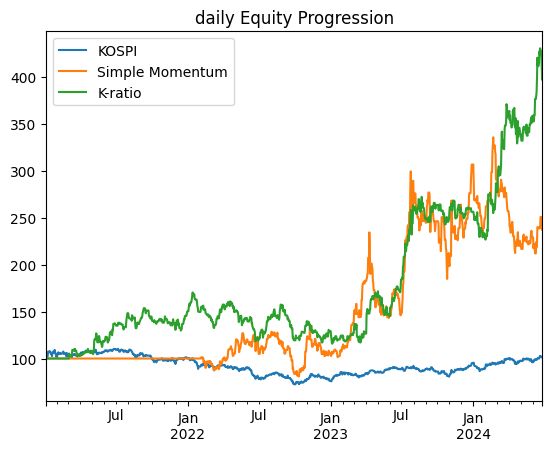

In [144]:
%%time
bts.run()

100%|█████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.74s/it]

Returning stats


,KOSPI,5 equities based on past 12 months,5 equities based on past 6 months
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,0.014736,5.52554,1.835032
cagr,0.004219,0.715801,0.349763
calmar,0.012322,2.824258,0.89205
max_drawdown,-0.342432,-0.253448,-0.392089
avg_drawdown,-0.08767,-0.058439,-0.102267
avg_drawdown_days,209.0,18.475,42.695652
daily_vol,0.17231,0.395361,0.382443
daily_sharpe,0.110941,1.591989,0.990737


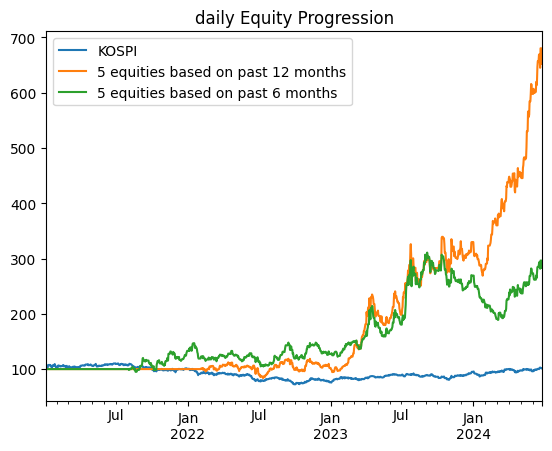

In [16]:
bts.get_stats([0,3,6,9])

,KOSPI,5 equities based on past 12 months,5 equities based on past 6 months
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,0.014736,5.52554,1.835032
cagr,0.004219,0.715801,0.349763
calmar,0.012322,2.824258,0.89205
max_drawdown,-0.342432,-0.253448,-0.392089
avg_drawdown,-0.08767,-0.058439,-0.102267
avg_drawdown_days,209.0,18.475,42.695652
daily_vol,0.17231,0.395361,0.382443
daily_sharpe,0.110941,1.591989,0.990737


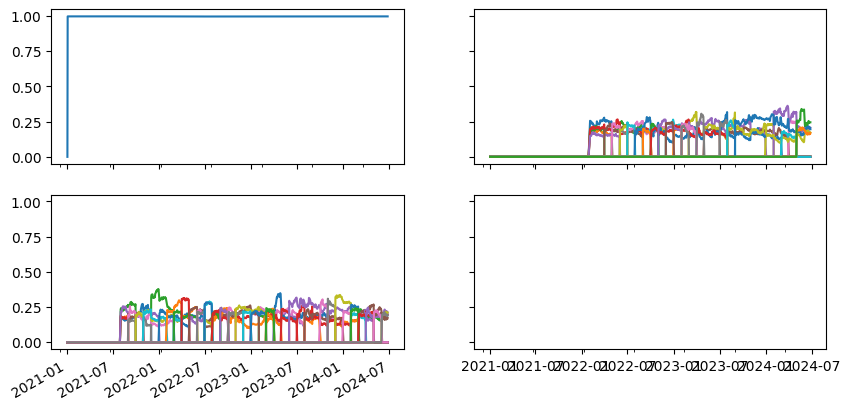

In [17]:
bts.plot_security_weights(legend=False)

In [18]:
bts.get_turnover().tail(5)

,KOSPI,5 equities based on past 12 months,5 equities based on past 6 months
2024-02-01,0.0,0.333139,0.840622
2024-03-04,0.0,0.225043,0.789885
2024-04-01,0.0,0.322380,0.227301
2024-05-02,0.0,0.504966,0.446104
2024-06-03,0.0,0.131331,0.403251


In [19]:
bts.get_historical().head()

,KOSPI,5 equities based on past 12 months,5 equities based on past 6 months
2021-01-03,100.00000,100.0,100.0
2021-01-04,100.00000,100.0,100.0
2021-01-05,101.49758,100.0,100.0
2021-01-06,100.51338,100.0,100.0
2021-01-07,102.84886,100.0,100.0


In [21]:
bts.get_transactions(1).tail(10)

price  quantity
Date       Security                    
2024-05-02 022100     40250.0      58.0
           042700    133000.0       2.0
           047050     46200.0    -139.0
           079550    178900.0     -67.0
           267260    239500.0     -19.0
2024-06-03 003230    587000.0     -14.0
           010120    213000.0       1.0
           022100     35650.0     111.0
           042700    146700.0      16.0
           267260    291000.0       5.0

In [30]:
#df = bts.get_security_weights(1).iloc[-20:]
df = bts.get_security_weights(1)
#df[df.columns[df.sum() > 0]].plot()

<Axes: >

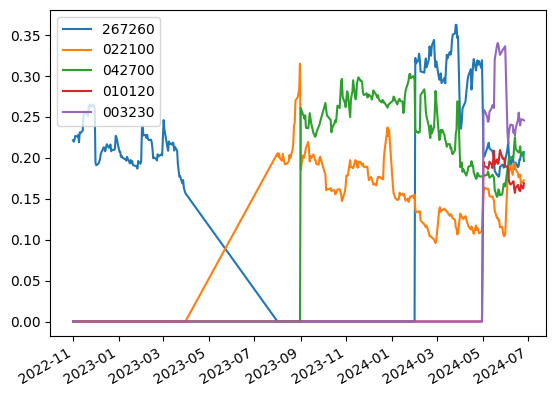

In [36]:
cols = df.columns[df.iloc[-1] > 0]
df.loc[df[cols].sum(axis=1) > 0, cols].plot()

In [40]:
df.loc[df[cols].sum(axis=1) > 0, cols].tail(40)

,267260,022100,042700,010120,003230
2024-04-25,0.313771,0.112364,0.180034,0.000000,0.000000
2024-04-26,0.318112,0.107730,0.177590,0.000000,0.000000
2024-04-29,0.309700,0.109730,0.177016,0.000000,0.000000
2024-04-30,0.319201,0.110771,0.177470,0.000000,0.000000
2024-05-02,0.205441,0.159351,0.178442,0.195257,0.252828
2024-05-03,0.201347,0.163232,0.178002,0.190110,0.258451
2024-05-07,0.211735,0.162097,0.179386,0.188174,0.250105
2024-05-08,0.215483,0.162428,0.183223,0.186442,0.244005
2024-05-09,0.218399,0.159443,0.179816,0.188892,0.245233
2024-05-10,0.211558,0.153172,0.175679,0.195326,0.256094


In [18]:
from pf_utils import get_date_range

df_equity = bts.df_equity
dt_format='%Y-%m-%d'
n_indent=2
fill_na=True
print_msg=True
"""
fill_na: set False to drop nan fields
"""
df = get_date_range(df_equity, slice_input=True)
dts = [x.strftime(dt_format) for x in (df.index.min(), df.index.max())]
print(f"period reset: {' ~ '.join(dts)}")

period reset: 2023-11-17 ~ 2024-06-25


In [19]:
df

,051600,001040,001440,316140,004800,028260,192080,383220,036460,185750,...,011170,004020,012750,032830,003620,039130,105560,021240,192820,009420
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-17,33850,89500,10791,12510,66100,117900,38954,88400.0,23600,111085,...,154900,35150,59800,69100,7820,51700,54600,51900,116900,36250
2023-11-20,34000,90000,10891,12490,66500,116900,39293,87100.0,23700,111276,...,156800,34700,59200,69200,7890,52300,53900,51000,118600,35100
2023-11-21,34000,88000,10873,12720,67000,118700,38954,90100.0,23750,114998,...,156300,35150,58500,69500,7900,53400,54100,51200,119600,36450
2023-11-22,34000,88500,10873,12700,67600,118200,39208,89300.0,23600,113948,...,155600,35750,59800,69600,7840,54900,54500,51200,114300,35750
2023-11-23,34200,88600,10837,12710,66700,118400,39462,88500.0,24250,119769,...,154700,35350,59600,70300,7850,54900,54300,50500,115200,37000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19,37200,124800,15700,14140,57300,135400,44500,65100.0,55800,100400,...,112300,28950,58700,87400,5340,57000,78900,55200,187100,33000
2024-06-20,36900,122600,15610,14360,57200,135100,45700,64400.0,63500,101600,...,120500,29350,59500,87600,5310,57400,80800,55900,180000,33000
2024-06-21,37200,125500,16240,14240,57800,135300,45400,63000.0,61900,94600,...,115000,29600,57600,87000,5250,59600,78600,58200,187000,33350


In [35]:
#df_equity.apply(lambda x: x.dropna().count()).quantile([0.05, 0.99])
df_equity.columns[df_equity.apply(lambda x: x.dropna().count()) < len(df_equity)]

Index(['383220', '271940', '402340', '457190', '259960', '302440', '137310',
       '323410', '373220', '361610', '375500', '377300', '329180', '454910',
       '450080'],
      dtype='object')

In [28]:
df_equity.apply(lambda x: x.dropna().count()).min()

147

In [34]:
import bt

data = bt.get('spy,agg', start='2010-01-01')

# create two separate algo stacks and combine the branches
logging_stack = bt.AlgoStack(
                    bt.algos.RunYearly(),
                    bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}')
                    )
trading_stack = bt.AlgoStack(
                    bt.algos.RunMonthly(),
                    bt.algos.SelectAll(),
                    bt.algos.WeighEqually(),
                    bt.algos.Rebalance()
                    )
branch_stack =  bt.AlgoStack(
                    # Upstream algos could go here...
                    bt.algos.Or( [ logging_stack, trading_stack ] )
                    # Downstream algos could go here...
                    )

s = bt.Strategy('strategy', [branch_stack], ['spy', 'agg'])
t = bt.Backtest(s, data)
r = bt.run(t)

  0%|                                                                         | 0/1 [00:00<?, ?it/s]

strategy:2010-01-04 00:00:00. Value:1000000, Price:100.0000
strategy:2011-01-03 00:00:00. Value:1107479, Price:110.7479
strategy:2012-01-03 00:00:00. Value:1168047, Price:116.8047
strategy:2013-01-02 00:00:00. Value:1291835, Price:129.1835
strategy:2014-01-02 00:00:00. Value:1449409, Price:144.9409
strategy:2015-01-02 00:00:00. Value:1601232, Price:160.1232
strategy:2016-01-04 00:00:00. Value:1606615, Price:160.6615
strategy:2017-01-03 00:00:00. Value:1743041, Price:174.3041
strategy:2018-01-02 00:00:00. Value:1955215, Price:195.5215
strategy:2019-01-02 00:00:00. Value:1916823, Price:191.6823
strategy:2020-01-02 00:00:00. Value:2305306, Price:230.5306
strategy:2021-01-04 00:00:00. Value:2593211, Price:259.3211
strategy:2022-01-03 00:00:00. Value:2943178, Price:294.3178


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.35it/s]

strategy:2023-01-03 00:00:00. Value:2495980, Price:249.5980
strategy:2024-01-02 00:00:00. Value:2868133, Price:286.8133
